# Оценка скорости работы

In [14]:
from src.FHT import ImageProcessor, NearestNeighborInterpolation, BilinearInterpolation
import sys
import os
from PIL import Image
import numpy as np
from time import time
import matplotlib.pyplot as plt

Интерполяция не влияет на сложность, только добавляет константу, так как вычисления проводятся для фиксированного количества элементов соседей.

В данных задания картинки разного размера и можно построить вывод по ним.

In [2]:
times = []
sizes = []

for name in os.listdir("./images"):
    image_name = "./images/" + name
    im_proc = ImageProcessor(image_name)
    shape = np.array(im_proc.image).shape

    for attemp in range(3):
        print(f"Image: {name}, attemp {attemp}")
        start = time()
        im_proc.RotateCurreтеImage(NearestNeighborInterpolation)
        end = time()

        times.append(end - start)
        sizes.append(shape[0] * shape[1])

times = np.array(times).reshape(-1, 3)
sizes = np.array(sizes).reshape(-1, 3)

Image: 8.jpg, attemp 0
Image: 8.jpg, attemp 1
Image: 8.jpg, attemp 2
Image: 9.jpg, attemp 0
Image: 9.jpg, attemp 1
Image: 9.jpg, attemp 2
Image: 10.jpg, attemp 0
Image: 10.jpg, attemp 1
Image: 10.jpg, attemp 2
Image: 4.jpg, attemp 0
Image: 4.jpg, attemp 1
Image: 4.jpg, attemp 2
Image: 5.jpg, attemp 0
Image: 5.jpg, attemp 1
Image: 5.jpg, attemp 2
Image: 7.jpg, attemp 0
Image: 7.jpg, attemp 1
Image: 7.jpg, attemp 2
Image: 6.jpg, attemp 0
Image: 6.jpg, attemp 1
Image: 6.jpg, attemp 2
Image: 2.jpg, attemp 0
Image: 2.jpg, attemp 1
Image: 2.jpg, attemp 2
Image: 3.jpg, attemp 0
Image: 3.jpg, attemp 1
Image: 3.jpg, attemp 2
Image: 1.jpg, attemp 0
Image: 1.jpg, attemp 1
Image: 1.jpg, attemp 2


In [8]:
times

array([[247.65778399, 245.38351989, 247.84610319],
       [249.97512507, 248.39164901, 245.93374586],
       [149.0465982 , 149.622926  , 149.01206589],
       [ 37.06136274,  36.94383621,  36.50666499],
       [ 60.63084006,  61.03851628,  60.078583  ],
       [103.79936099, 104.82283711, 103.21726108],
       [ 24.66577291,  24.68514729,  24.752841  ],
       [ 30.49218392,  30.18766689,  30.24660301],
       [ 90.28533506,  89.94223905,  88.43323231],
       [ 43.19147205,  43.18555117,  43.07318568]])

In [10]:
sizes

array([[11361342, 11361342, 11361342],
       [11361342, 11361342, 11361342],
       [ 6270418,  6270418,  6270418],
       [ 1776000,  1776000,  1776000],
       [ 2557200,  2557200,  2557200],
       [ 5089456,  5089456,  5089456],
       [ 1136800,  1136800,  1136800],
       [ 1438200,  1438200,  1438200],
       [ 3996000,  3996000,  3996000],
       [ 2149400,  2149400,  2149400]])

In [3]:
np.save('results/times.npy', times)
np.save('results/sizes.npy', sizes)

In [4]:
times = np.load('results/times.npy')
times

array([[237.40728021, 234.8361659 , 235.81749296],
       [237.39143872, 239.12691188, 240.65142417],
       [142.55168796, 141.99511409, 141.49188209],
       [ 35.00629616,  35.38338614,  34.96539736],
       [ 57.80059385,  57.20519114,  57.41169596],
       [101.0647397 , 101.37590289, 100.76420975],
       [ 23.63804007,  23.35126495,  23.64881682],
       [ 28.8211031 ,  29.01235104,  28.91546392],
       [ 85.61673617,  85.72319913,  85.13414192],
       [ 42.1708858 ,  41.482337  ,  42.09194112]])

In [5]:
sizes = np.load('results/sizes.npy')
sizes

array([[11361342, 11361342, 11361342],
       [11361342, 11361342, 11361342],
       [ 6270418,  6270418,  6270418],
       [ 1776000,  1776000,  1776000],
       [ 2557200,  2557200,  2557200],
       [ 5089456,  5089456,  5089456],
       [ 1136800,  1136800,  1136800],
       [ 1438200,  1438200,  1438200],
       [ 3996000,  3996000,  3996000],
       [ 2149400,  2149400,  2149400]])

Построим зависимости

In [9]:
size_values, size_var = sizes.mean(axis=1), sizes.var(axis=1)
time_values, time_var = times.mean(axis=1), times.var(axis=1)

In [11]:
time_var

array([1.12233945, 1.77372332, 0.18735616, 0.03539824, 0.06093225,
       0.0623677 , 0.01898814, 0.00609632, 0.06569111, 0.09466099])

Погрешности по времени малы, так что можно строить просто для средних значений

In [12]:
# Перевод в мегапиксели
size_values /= 10**6
size_values

array([11.361342, 11.361342,  6.270418,  1.776   ,  2.5572  ,  5.089456,
        1.1368  ,  1.4382  ,  3.996   ,  2.1494  ])

In [17]:
time_values

array([236.02031302, 239.05659159, 142.01289471,  35.11835988,
        57.47249365, 101.06828411,  23.54604061,  28.91630602,
        85.49135907,  41.91505464])

In [18]:
size_values = np.sort(size_values)
time_values = np.sort(time_values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


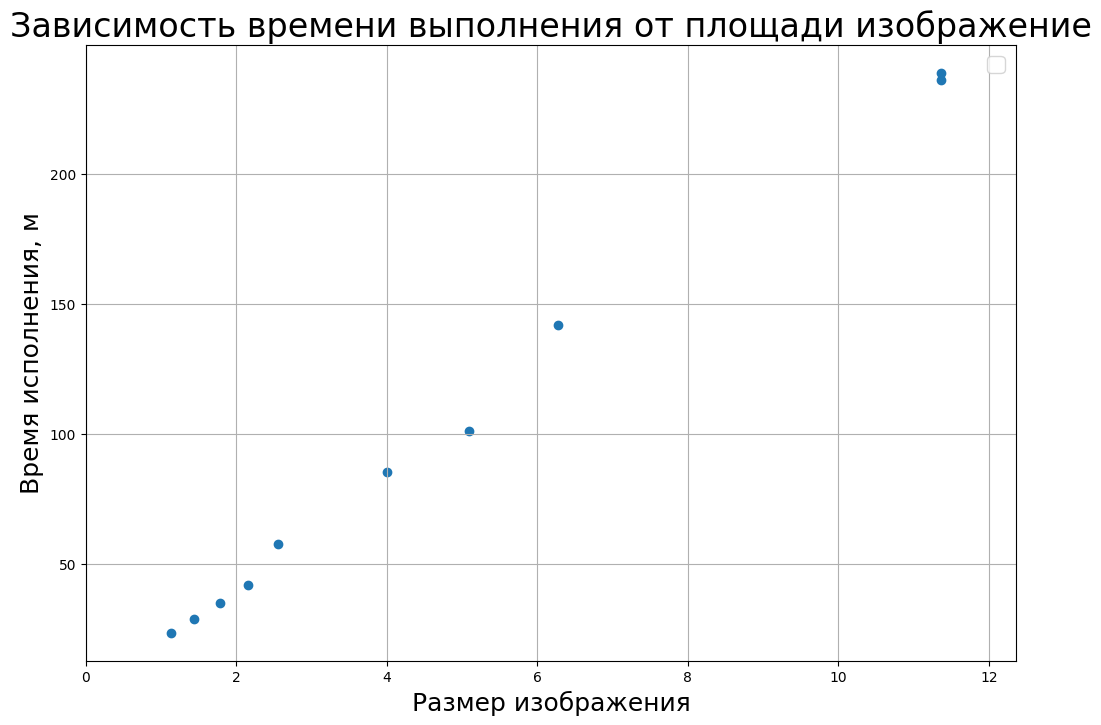

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(size_values, time_values)

plt.title("Зависимость времени выполнения от площади изображение", fontsize=24)
plt.xlim([0, np.max(size_values) + 1])
plt.xlabel("Размер изображения", fontsize=18)
plt.ylabel("Время исполнения, м", fontsize=18)
plt.grid(True)
plt.legend(fontsize=16)

In [22]:
from scipy.optimize import curve_fit

Приближение будем выполнять функцией, полученной в теории

/var/folders/3r/65d995rs45j81zcqd47tq_qm0000gn/T/ipykernel_24493/2395805385.py:2: RuntimeWarning: divide by zero encountered in log
  return A*x*x*np.log(x) + H + D*x*x
/var/folders/3r/65d995rs45j81zcqd47tq_qm0000gn/T/ipykernel_24493/2395805385.py:2: RuntimeWarning: invalid value encountered in multiply
  return A*x*x*np.log(x) + H + D*x*x


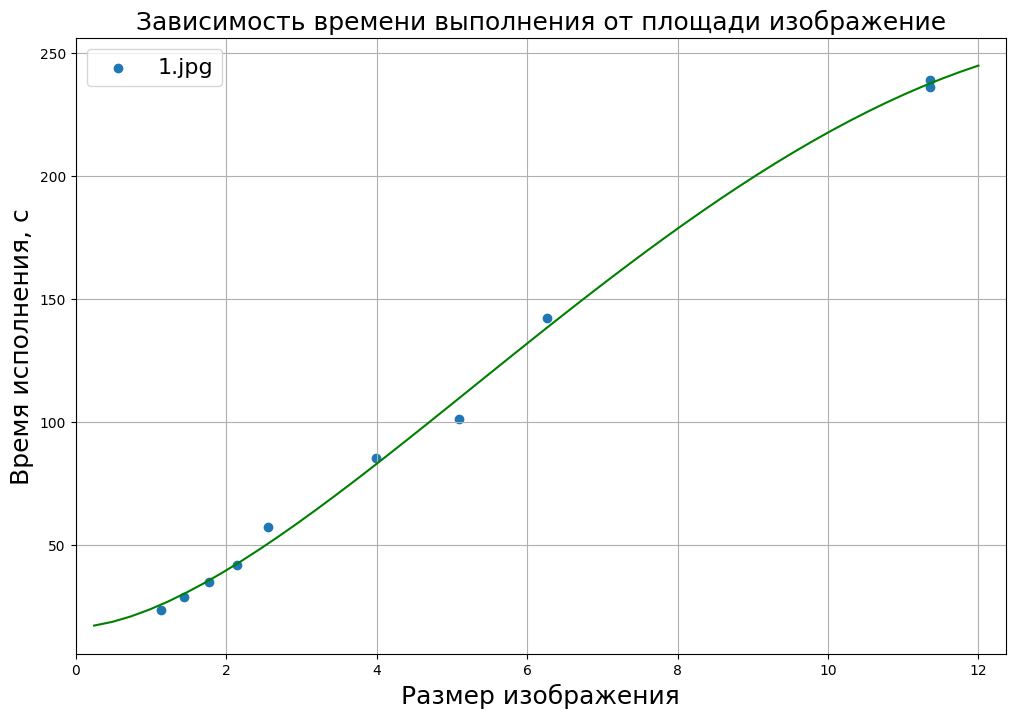

In [43]:
def func1(x, A, D, H):
    return A*x*x*np.log(x) + H + D*x*x

plt.figure(figsize=(12, 8))
x = np.linspace(0, 12, 50)
popt, pcov = curve_fit(func1, size_values, time_values, maxfev=10**6)
plt.scatter(size_values, time_values, label=name)
plt.plot(x, func1(x, *popt), color='green')

plt.title("Зависимость времени выполнения от площади изображение", fontsize=18)
plt.xlim([0, np.max(size_values) + 1])
plt.xlabel("Размер изображения", fontsize=18)
plt.ylabel("Время исполнения, с", fontsize=18)
plt.grid(True)
plt.legend(fontsize=16)

## Вывод

Так как релузльтаты идеально приближаются функцией, то они явно являются $O(N^2 \log N)$, так как можно подобрать положительный коэффициент перед $N^2 \log N$, чтобы получить ограничение сверху. 

То, что график приближается не так идеально можно аргументировать реализацией алгоритма, а именно, необходимостью обрезать одну из граней до степени двойки. Поэтому переходы в сложности работы будут скачкообразны из-за соответствующего скачка при увеличении сложности работы БПХ. При этом рост сложности для одинаковой степени аргументируется пост- и предобработками. Так что получить в данном случае красивое приближение было бы проблематично